 Consider only the below columns and prepare a prediction model for predicting Price.

 Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)




## Multiple Linear Regression Assignment(Toyota Corolla)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from sklearn import metrics 
%matplotlib inline

In [2]:
# Read the data 
data=pd.read_csv('ToyotaCorolla.csv',encoding= 'unicode_escape')
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


## Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
# selecting only required column
data = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
#rename column for easy use
data=data.rename({'Age_08_04':'age','Quarterly_Tax':'QT'},axis=1)
data.head()

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
#checking for duplicate
data[data.duplicated()]

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [7]:
# drop duplicate value
data1 = data.drop_duplicates()
data1

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
data1.describe()

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


## Correlation 

In [9]:
data1.corr()

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


## Scatterplot between variables along with histograms

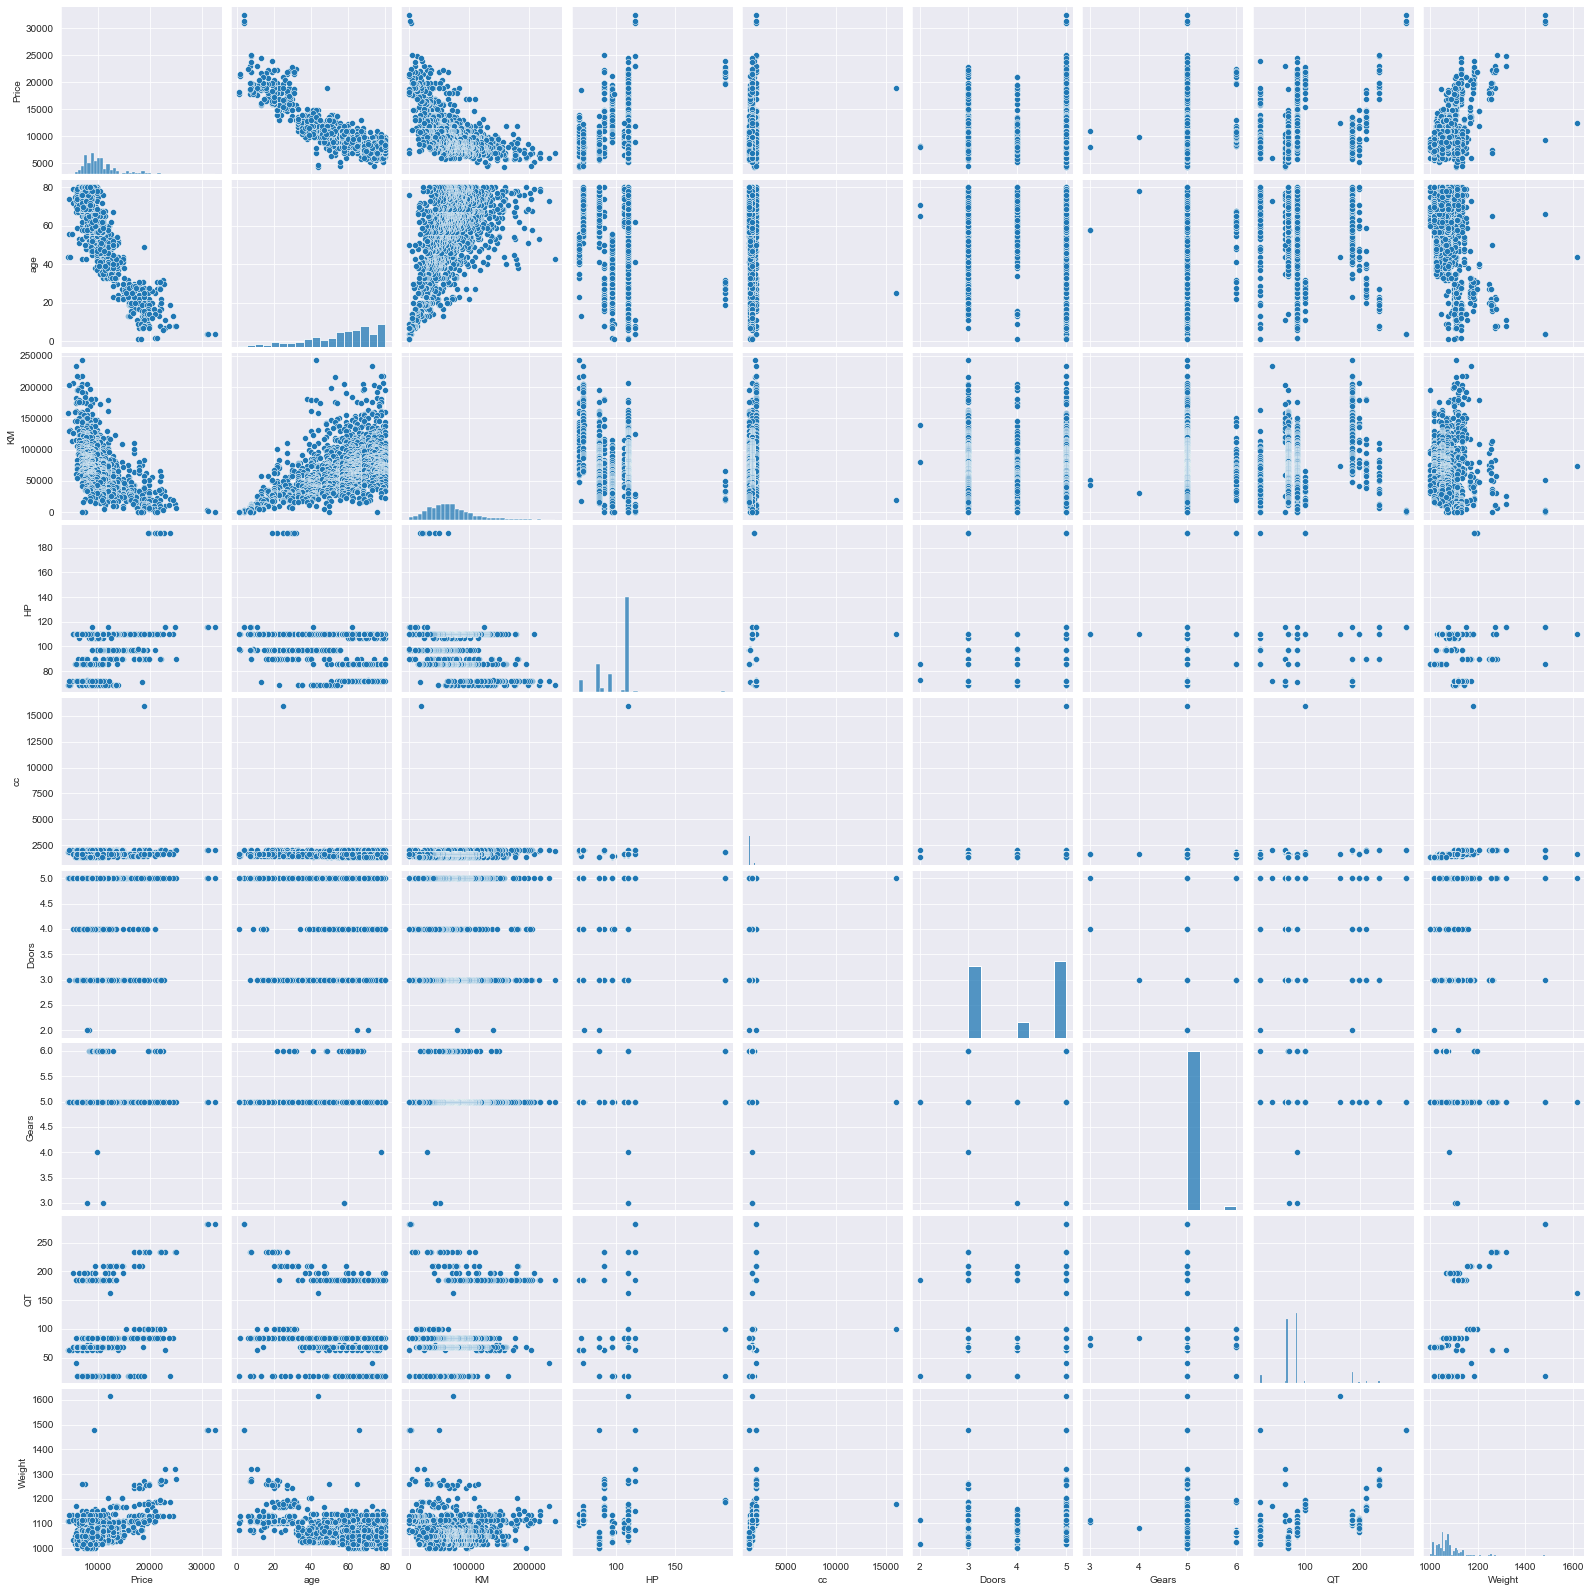

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

## Model building

In [11]:
model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+QT+Weight',data=data1).fit()

## fatching parameters 

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:15:31   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## SLR and MLR for in-significant variables "cc" and "Doors"

In [13]:
slr_c=smf.ols("Price~cc", data=data1).fit()
slr_c.tvalues,slr_c.pvalues

(Intercept    24.879592
 cc            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64)

In [14]:
# cc has significant pvalue

In [15]:
slr_d=smf.ols("Price~Doors", data=data1).fit()
slr_d.tvalues,slr_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [16]:
# doors has significant pvalue

In [17]:
mlr=smf.ols("Price~cc+Doors", data=data1).fit()
mlr.tvalues,mlr.pvalues

(Intercept    12.786341
 cc            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 cc           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

In [18]:
# Both cc and doors have significant pvalue

## Model validation
### checking collinearity in the features


In [19]:
# calculating VIF(checking collinearity)
rsq_age=smf.ols('age~KM+HP+cc+Doors+Weight+Gears+QT',data=data1).fit().rsquared
vif_age=1/(1-rsq_age)
rsq_KM=smf.ols('KM~age+HP+cc+Doors+Weight+Gears+QT',data=data1).fit().rsquared
vif_KM=1/(1-rsq_KM)
rsq_HP=smf.ols('HP~age+KM+cc+Doors+Weight+Gears+QT',data=data1).fit().rsquared
vif_HP=1/(1-rsq_HP)
rsq_cc=smf.ols('cc~age+KM+HP+Doors+Weight+Gears+QT',data=data1).fit().rsquared
vif_cc=1/(1-rsq_cc)
rsq_Doors=smf.ols('Doors~age+KM+HP+cc+Weight+Gears+QT',data=data1).fit().rsquared
vif_Doors=1/(1-rsq_Doors)
rsq_Weight=smf.ols('Weight~age+KM+HP+cc+Doors+Gears+QT',data=data1).fit().rsquared
vif_Weight=1/(1-rsq_Weight)
rsq_Gears=smf.ols('Gears~age+KM+HP+cc+Doors+Weight+QT',data=data1).fit().rsquared
vif_Gears=1/(1-rsq_Gears)
rsq_QT=smf.ols('QT~age+KM+HP+cc+Doors+Weight+Gears',data=data1).fit().rsquared
vif_QT=1/(1-rsq_QT)

# sorting vif value in a DataFrame
d1={'Variables':['age','KM','HP','cc','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Weight,vif_Gears,vif_QT]}
Vif_df=pd.DataFrame(d1)
Vif_df


,Variables,Vif
0,age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,2.487180
6,QT,1.098843
7,Weight,2.295375


In [20]:
# No Collinearity, so consider all varaibles in Regression equation

# Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

C:\Users\hmaca\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


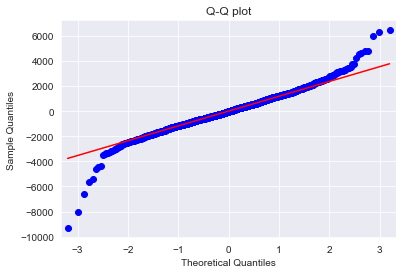

In [21]:
sm.qqplot(model.resid,line='q')
plt.title("Q-Q plot")
plt.show()

In [22]:
 # outliar detection from above QQ plot of residuals

In [23]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

## Residual Plot for Homoscedasticity

In [24]:
# Defining function to calculate Standardized values(Z_score) of model's fitted values and residual values
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

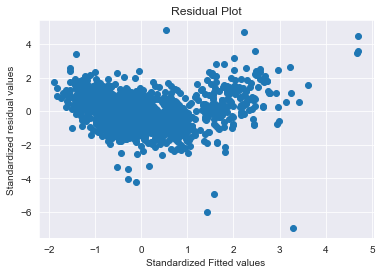

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual vs Regressors

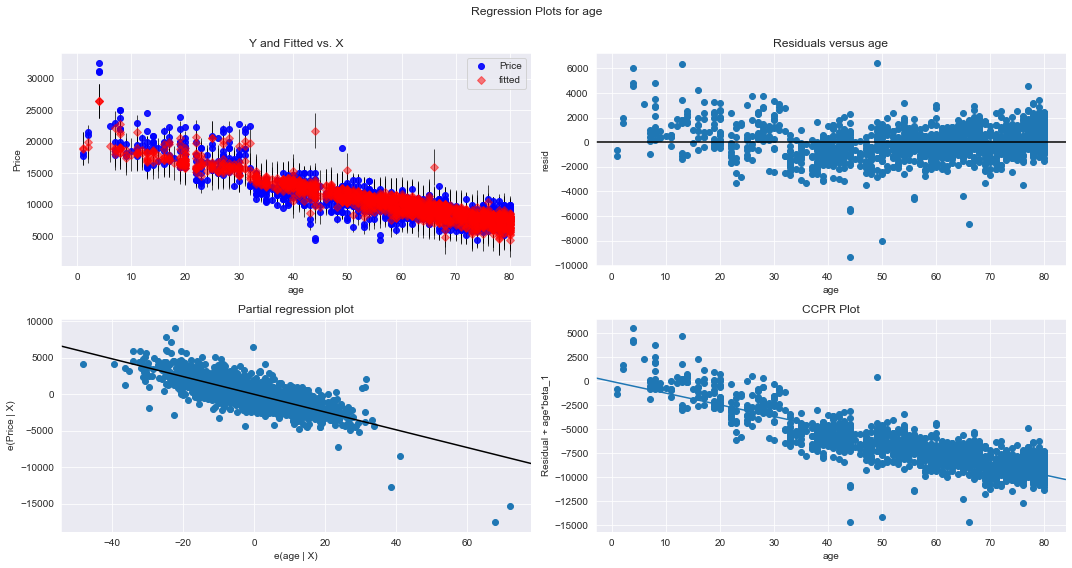

In [26]:
# checking how variables are corresponding to error
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'age',fig=fig)
plt.show()

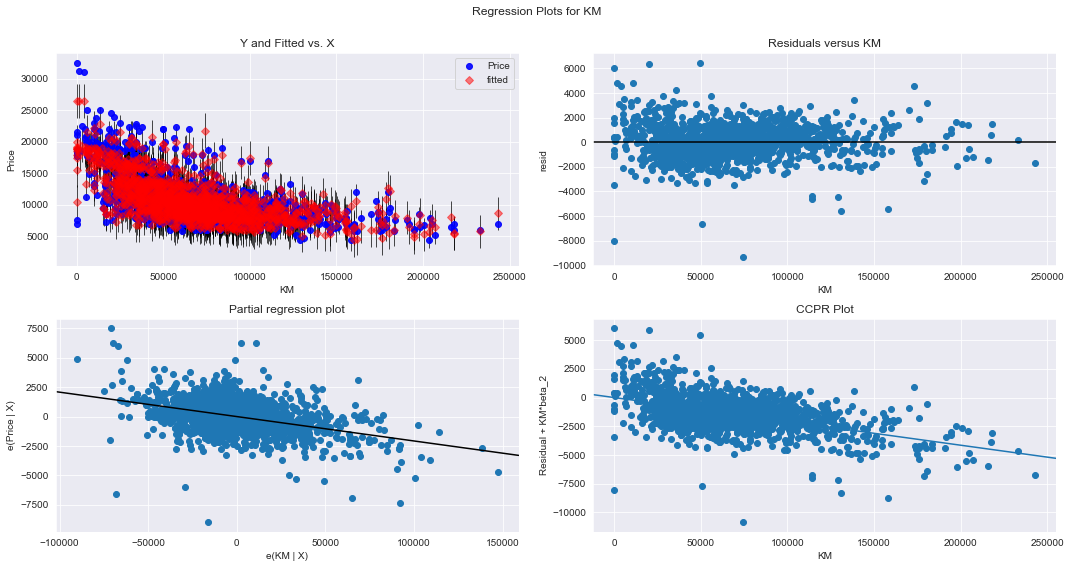

In [27]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()


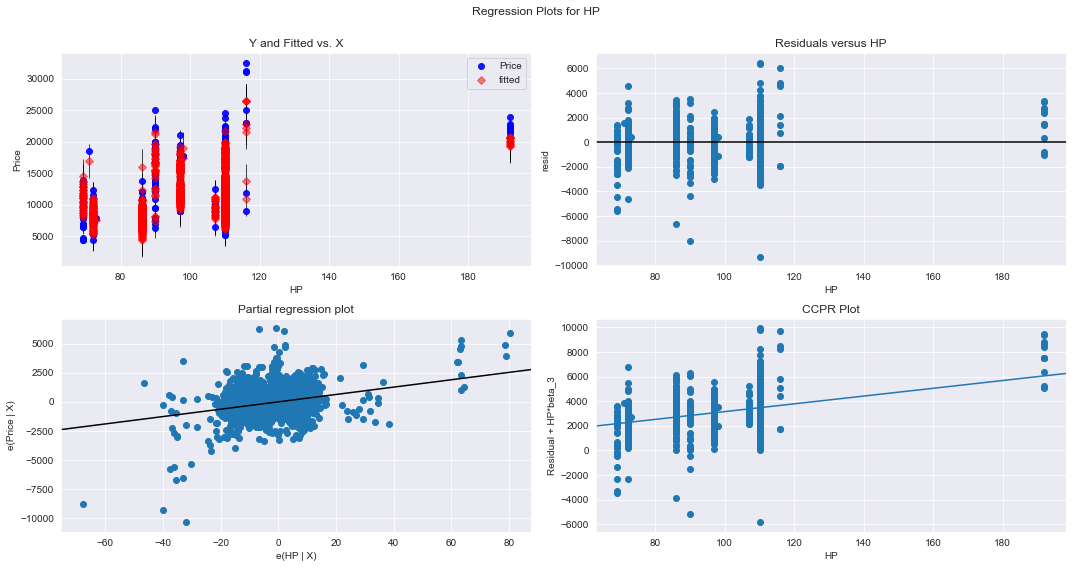

In [28]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

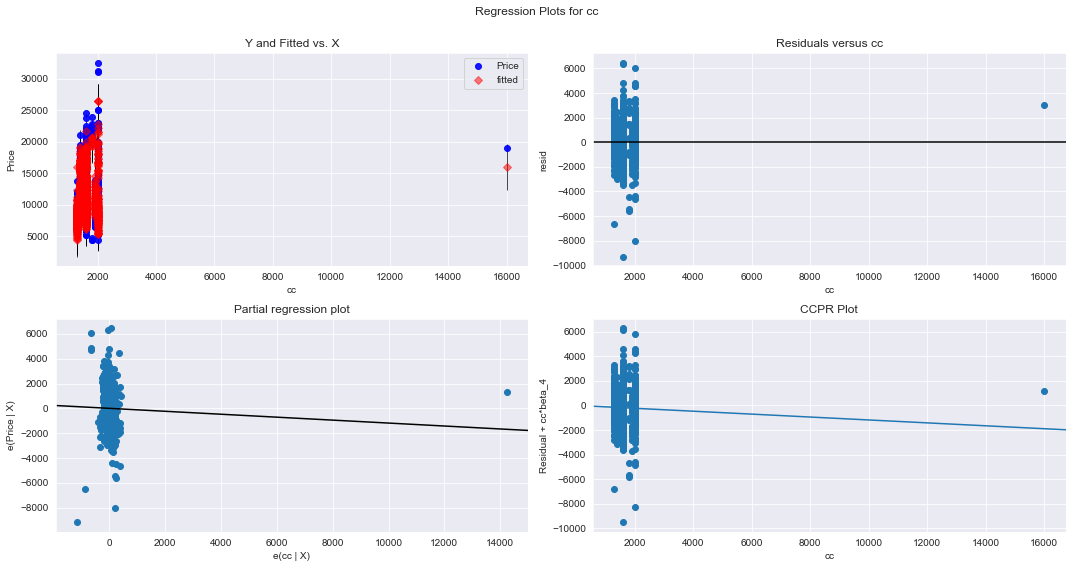

In [29]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()

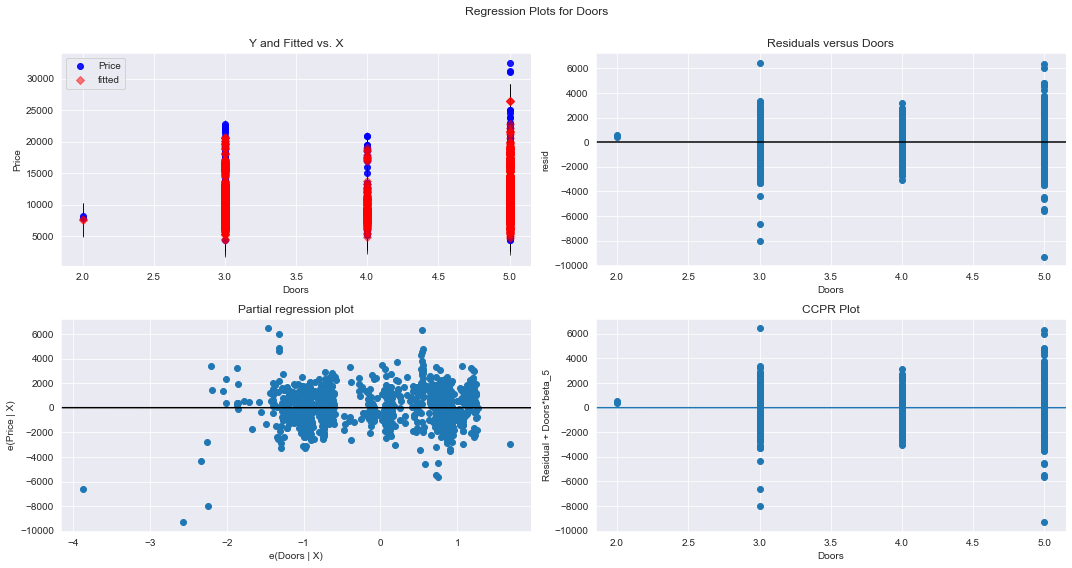

In [30]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

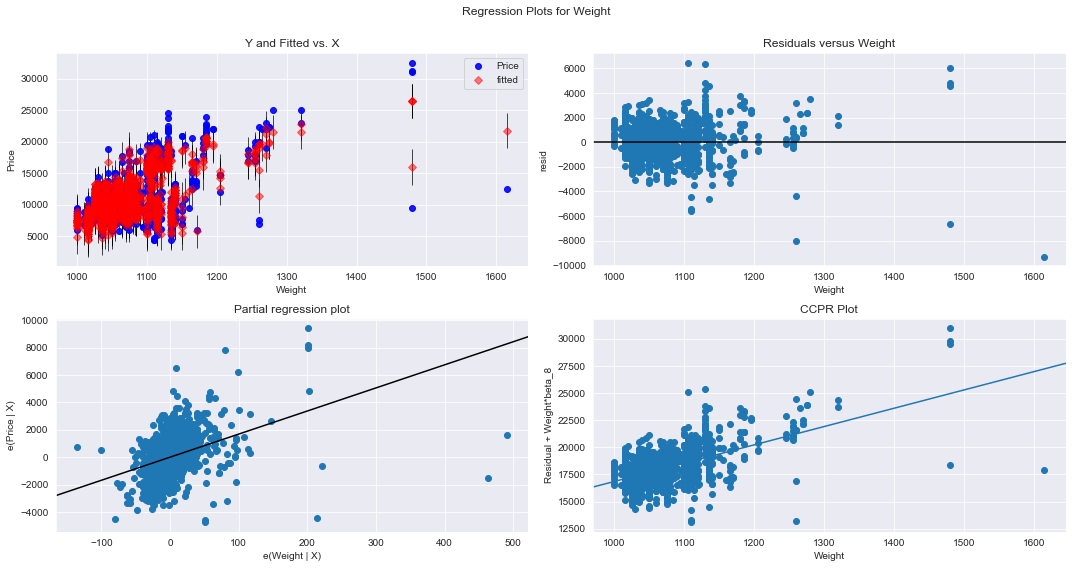

In [31]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

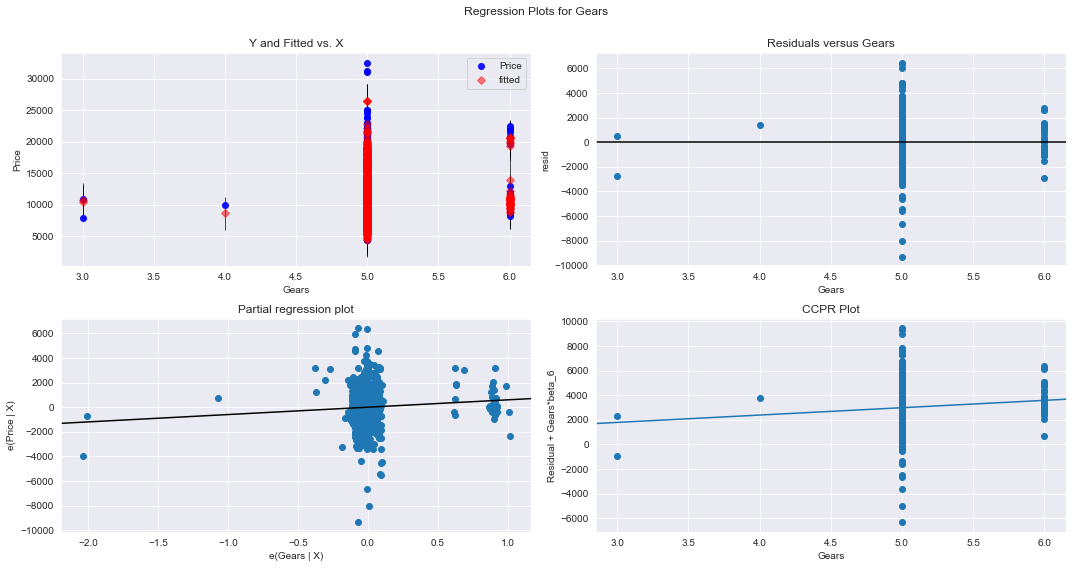

In [32]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

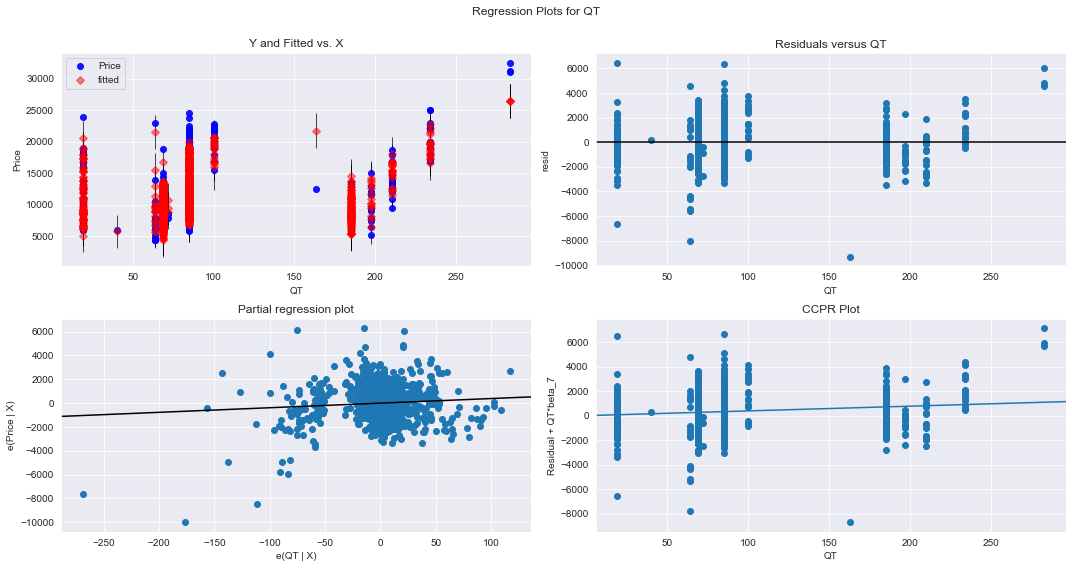

In [33]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"QT",fig=fig)
plt.show()

## Model Deletion Diagnostics (checking Outliers or Influencers)

## Cook's Distance

In [34]:
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

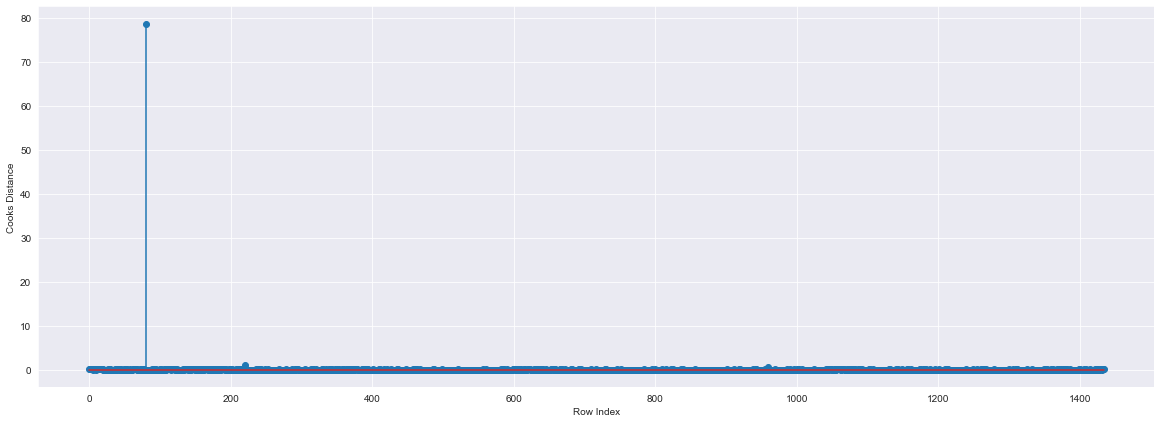

In [35]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [36]:
#index and value of influencer where C>0.5
(np.argmax(c),np.max(c))

(80, 78.7295058224916)

## Leverage value

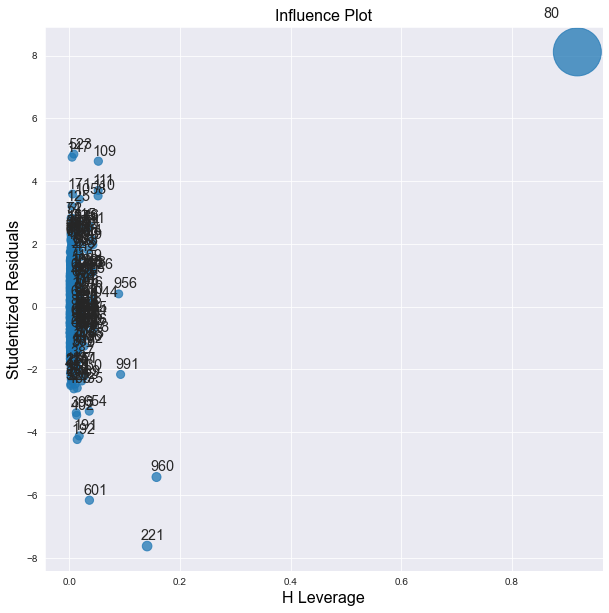

In [37]:
fig,ax=plt.subplots(figsize=(10,10))
fig=influence_plot(model,ax = ax)

In [38]:
# Leverage Cuttoff Value
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [39]:
data1[data1.index.isin([80])]

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [40]:
# Creating a copy of data so that original dataset is not affected
data_new=data1.copy()
data_new

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


## Improving the Model

In [41]:
new_data=data_new.drop(data_new.index[80],axis=0).reset_index(drop=True)
new_data

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


## using loop for Model Deletion Diagnostic

In [42]:

while np.max(c)>0.5:
    model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+QT+Weight',data=new_data).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c),np.max(c)
    new_data=new_data.drop(new_data.index[np.argmax(c)],axis=0).reset_index(drop=True)
    new_data
else:
    model1=smf.ols('Price~age+KM+HP+cc+Doors+Gears+QT+Weight',data=new_data).fit()
    model1.rsquared 
    print("Thus model accuracy is improved to",model1.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [43]:
#comparing of AIC(akaike information criteria) value of first model and Finall model
print("Aic of First model",model.aic,"\n","Aic of next model",model1.aic)

Aic of First model 24453.23573612724 
 Aic of next model 24382.707627340682


C:\Users\hmaca\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


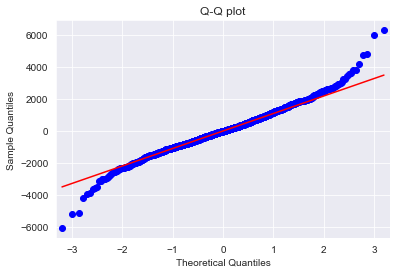

In [44]:
#residual analysis
sm.qqplot(model1.resid,line='q')
plt.title("Q-Q plot")
plt.show()

In [45]:
new_data.shape

(1431, 9)

In [46]:
# prediction of price
predict=model1.predict(new_data)
pred_y=pd.DataFrame({'Actual Price':new_data.Price,'Predicted Price':predict})
pred_y.head()

,Actual Price,Predicted Price
0,13500,16345.352610
1,13750,15886.635544
2,13950,16328.224968
3,14950,15996.318854
4,13750,15883.424182


In [47]:
#error calculation
print("Mean Absolute Error:", metrics.mean_absolute_error(new_data.Price,predict))
print("Mean Squared Error:", metrics.mean_squared_error(new_data.Price,predict))  
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(new_data.Price,predict)))

Mean Absolute Error: 911.3784746425214
Mean Squared Error: 1452030.4958613648
Root Mean Squared Error: 1205.0022804382425


## Building model with log transformation

In [48]:
data2=pd.DataFrame.copy(new_data)
data2['log_age']=np.log(new_data.age)
data2['log_km']=np.log(new_data.KM)
data2['log_hp']=np.log(new_data.HP)
data2['log_cc']=np.log(new_data.cc)
data2['log_Doors']=np.log(new_data.Doors)
data2['log_G']=np.log(new_data.Gears)
data2['log_Q']=np.log(new_data.QT)
data2['log_W']=np.log(new_data.Weight)
data2.head()

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight,log_age,log_km,log_hp,log_cc,log_Doors,log_G,log_Q,log_W
0,13500,23,46986,90,2000,3,5,210,1165,3.135494,10.757605,4.49981,7.600902,1.098612,1.609438,5.347108,7.060476
1,13750,23,72937,90,2000,3,5,210,1165,3.135494,11.197351,4.49981,7.600902,1.098612,1.609438,5.347108,7.060476
2,13950,24,41711,90,2000,3,5,210,1165,3.178054,10.638520,4.49981,7.600902,1.098612,1.609438,5.347108,7.060476
3,14950,26,48000,90,2000,3,5,210,1165,3.258097,10.778956,4.49981,7.600902,1.098612,1.609438,5.347108,7.060476
4,13750,30,38500,90,2000,3,5,210,1170,3.401197,10.558414,4.49981,7.600902,1.098612,1.609438,5.347108,7.064759


In [52]:
log_model=smf.ols('Price~log_age+log_km+log_hp+log_cc+log_Doors+log_G+log_Q+log_W',data=data2).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     1006.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:20:00   Log-Likelihood:                -12393.
No. Observations:                1431   AIC:                         2.480e+04
Df Residuals:                    1422   BIC:                         2.485e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.682e+05   9692.443    -17.353      0.000   -1.87e+05   -1.49e+05
log_age    -4889.5036    121.420    -40.269      0.000   -5127.685   -4651.322
log_km       100.9036     50.909      1.982      0.048       1.039     200.769
log_hp      5186.5384    275.909     18.798      0.000    4645.306    5727.771
log_cc     -6970.1909    509.186    -13.689      0.000   -7969.028   -5971.354
log_Doors   -623.0826    167.242     -3.726      0.000    -951.150    -295.015
log_G       2582.9514   1031.292      2.505      0.012     559.935    4605.968
log_Q        543.9231    107.231      5.072      0.000     333.575     754.271
log_W       3.135e+04   1673.941     18.726      0.000    2.81e+04    3.46e+04
==============================================================================
Omnibus:                      276.966   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2665.733
Skew:                          -0.606   Prob(JB):                         0.00
Kurtosis:                       9.576   Cond. No.                     4.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\hmaca\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


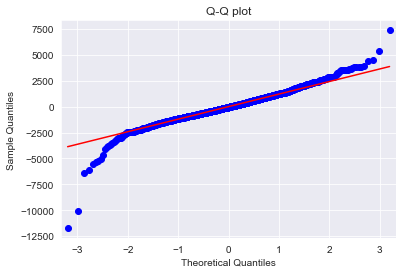

In [53]:
sm.qqplot(log_model.resid,line='q')
plt.title("Q-Q plot")
plt.show()

In [54]:
# prediction of price
log_predict=log_model.predict(data2)
pred_log=pd.DataFrame({'Actual Price':new_data.Price,'Predicted Price':log_predict})
pred_log.head()

,Actual Price,Predicted Price
0,13500,15626.786317
1,13750,15671.158300
2,13950,15406.674847
3,14950,15029.476249
4,13750,14441.778218


In [55]:
#error calculation
print("Mean Absolute Error:", metrics.mean_absolute_error(data2.Price,log_predict))
print("Mean Squared Error:", metrics.mean_squared_error(data2.Price,log_predict))  
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(data2.Price,log_predict)))

Mean Absolute Error: 1026.959011217586
Mean Squared Error: 1950341.5909709055
Root Mean Squared Error: 1396.5463082085412


## Building model with square transformation

In [56]:
data3=pd.DataFrame.copy(new_data)
data3['s_age']=(new_data.age)**2
data3['s_km']=(new_data.KM)**2
data3['s_hp']=(new_data.HP)**2
data3['s_cc']=(new_data.cc)**2
data3['s_D']=(new_data.Doors)**2
data3['s_G']=(new_data.Gears)**2
data3['s_Q']=(new_data.QT)**2
data3['s_W']=(new_data.Weight)**2
data3.head()

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight,s_age,s_km,s_hp,s_cc,s_D,s_G,s_Q,s_W
0,13500,23,46986,90,2000,3,5,210,1165,529,2207684196,8100,4000000,9,25,44100,1357225
1,13750,23,72937,90,2000,3,5,210,1165,529,5319805969,8100,4000000,9,25,44100,1357225
2,13950,24,41711,90,2000,3,5,210,1165,576,1739807521,8100,4000000,9,25,44100,1357225
3,14950,26,48000,90,2000,3,5,210,1165,676,2304000000,8100,4000000,9,25,44100,1357225
4,13750,30,38500,90,2000,3,5,210,1170,900,1482250000,8100,4000000,9,25,44100,1368900


In [57]:
s_model=smf.ols('Price~s_age+s_km+s_hp+s_cc+s_D+s_G+s_Q+s_W', data=data3).fit()
s_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1032.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:20:13   Log-Likelihood:                -12378.
No. Observations:                1431   AIC:                         2.477e+04
Df Residuals:                    1422   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4846.2414    790.959     -6.127      0.000   -6397.812   -3294.670
s_age         -1.0348      0.024    -42.304      0.000      -1.083      -0.987
s_km       -8.596e-08   6.71e-09    -12.817      0.000   -9.91e-08   -7.28e-08
s_hp           0.1336      0.014      9.404      0.000       0.106       0.161
s_cc          -0.0014      0.000    -13.349      0.000      -0.002      -0.001
s_D          -25.0418      5.321     -4.706      0.000     -35.480     -14.604
s_G           12.0664     19.542      0.617      0.537     -26.267      50.400
s_Q           -0.0069      0.007     -1.040      0.299      -0.020       0.006
s_W            0.0191      0.001     29.056      0.000       0.018       0.020
==============================================================================
Omnibus:                      136.819   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              658.689
Skew:                           0.310   Prob(JB):                    9.28e-144
Kurtosis:                       6.266   Cond. No.                     2.00e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\hmaca\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


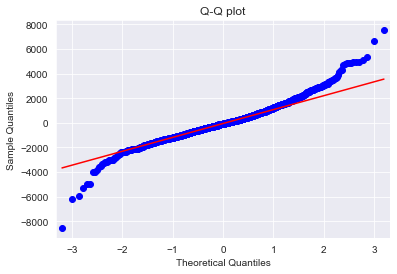

In [58]:
sm.qqplot(s_model.resid,line='q')
plt.title("Q-Q plot")
plt.show()

In [59]:
# prediction of price
s_predict=s_model.predict(data3)
pred_s=pd.DataFrame({'Actual Price':new_data.Price,'Predicted Price':s_predict})
pred_s.head()

,Actual Price,Predicted Price
0,13500,15581.101782
1,13750,15313.573106
2,13950,15572.684477
3,14950,15420.700318
4,13750,15482.304297


In [60]:
#error calculation
print("Mean Absolute Error:", metrics.mean_absolute_error(data3.Price,s_predict))
print("Mean Squared Error:", metrics.mean_squared_error(data3.Price,s_predict))  
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(data3.Price,s_predict)))

Mean Absolute Error: 1009.3957972419389
Mean Squared Error: 1909757.9317522736
Root Mean Squared Error: 1381.9399161151232


## Building model with square root transformation

In [61]:
data4=pd.DataFrame.copy(new_data)
data4['sq_age']=np.sqrt(new_data.age)
data4['sq_km']=np.sqrt(new_data.KM)
data4['sq_hp']=np.sqrt(new_data.HP)
data4['sq_cc']=np.sqrt(new_data.cc)
data4['sq_D']=np.sqrt(new_data.Doors)
data4['sq_G']=np.sqrt(new_data.Gears)
data4['sq_Q']=np.sqrt(new_data.QT)
data4['sq_W']=np.sqrt(new_data.Weight)
data4.head()

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight,sq_age,sq_km,sq_hp,sq_cc,sq_D,sq_G,sq_Q,sq_W
0,13500,23,46986,90,2000,3,5,210,1165,4.795832,216.762543,9.486833,44.72136,1.732051,2.236068,14.491377,34.132096
1,13750,23,72937,90,2000,3,5,210,1165,4.795832,270.068510,9.486833,44.72136,1.732051,2.236068,14.491377,34.132096
2,13950,24,41711,90,2000,3,5,210,1165,4.898979,204.232710,9.486833,44.72136,1.732051,2.236068,14.491377,34.132096
3,14950,26,48000,90,2000,3,5,210,1165,5.099020,219.089023,9.486833,44.72136,1.732051,2.236068,14.491377,34.132096
4,13750,30,38500,90,2000,3,5,210,1170,5.477226,196.214169,9.486833,44.72136,1.732051,2.236068,14.491377,34.205263


In [62]:
sq_model=smf.ols('Price~sq_age+sq_km+sq_hp+sq_cc+sq_D+sq_G+sq_Q+sq_W', data=data4).fit()
sq_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     1484.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:20:18   Log-Likelihood:                -12151.
No. Observations:                1431   AIC:                         2.432e+04
Df Residuals:                    1422   BIC:                         2.437e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.899e+04   2822.910    -13.811      0.000   -4.45e+04   -3.35e+04
sq_age     -1477.1546     34.136    -43.273      0.000   -1544.116   -1410.193
sq_km         -8.4364      0.625    -13.493      0.000      -9.663      -7.210
sq_hp        775.2097     51.184     15.146      0.000     674.805     875.614
sq_cc       -264.2961     22.787    -11.598      0.000    -308.997    -219.596
sq_D        -496.6223    143.278     -3.466      0.001    -777.682    -215.563
sq_G        2709.2518    783.255      3.459      0.001    1172.793    4245.710
sq_Q         116.3514     23.736      4.902      0.000      69.790     162.913
sq_W        1808.5633     84.904     21.301      0.000    1642.013    1975.114
==============================================================================
Omnibus:                       75.760   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.505
Skew:                           0.111   Prob(JB):                     1.64e-57
Kurtosis:                       5.082   Cond. No.                     2.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\hmaca\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


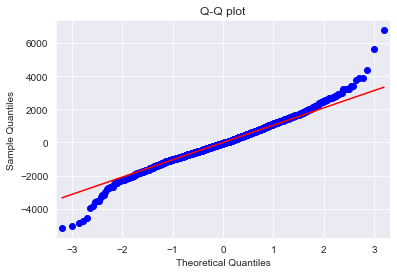

In [63]:
sm.qqplot(sq_model.resid,line='q')
plt.title("Q-Q plot")
plt.show()

In [64]:
# prediction of price
sq_predict=sq_model.predict(data4)
pred_sq=pd.DataFrame({'Actual Price':new_data.Price,'Predicted Price':sq_predict})
pred_sq.tail()

,Actual Price,Predicted Price
1426,7500,9258.460845
1427,10845,8757.740558
1428,8500,8907.475251
1429,7250,8998.677548
1430,6950,11502.677591


In [65]:
#error calculation
print("Mean Absolute Error:", metrics.mean_absolute_error(data4.Price,sq_predict))
print("Mean Squared Error:", metrics.mean_squared_error(data4.Price,sq_predict))  
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(data4.Price,sq_predict)))

Mean Absolute Error: 893.5287975226122
Mean Squared Error: 1390076.4680588846
Root Mean Squared Error: 1179.0150414896684


In [66]:
model_data={'Prep_Models':['Model','Model1','log_Model','s_model','sq_model'],'Rsquared':[model.rsquared,model1.rsquared,log_model.rsquared,s_model.rsquared,sq_model.rsquared]}
R_value=pd.DataFrame(model_data)
R_value

,Prep_Models,Rsquared
0,Model,0.883968
1,Model1,0.888240
2,log_Model,0.849885
3,s_model,0.853009
4,sq_model,0.893008


## Square root Model have higest R_square value and also have low RMSE value,Hence this model give the best prediction price  

### Prediction for new data points 

In [67]:
colum=['sq_age','sq_km','sq_hp','sq_cc','sq_D','sq_G','sq_Q','sq_W']
value=(27,1500,110,1500,4,5,210,1660)
value=np.sqrt(value)
value

array([ 5.19615242, 38.72983346, 10.48808848, 38.72983346,  2.        ,
        2.23606798, 14.49137675, 40.74309757])

In [68]:
new_d=pd.DataFrame(dict(zip(colum,value)),index=[0])
new_d

,sq_age,sq_km,sq_hp,sq_cc,sq_D,sq_G,sq_Q,sq_W
0,5.196152,38.729833,10.488088,38.729833,2.0,2.236068,14.491377,40.743098


In [69]:
sq_model.predict(new_d)

0    31340.959266
dtype: float64